In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [64]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [65]:
Y = houseprice_df['saleprice']
X = houseprice_df[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [66]:
import statsmodels.api as sm

In [67]:
x_train = sm.add_constant(x_train)

result = sm.OLS(y_train,x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     746.0
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:46:26   Log-Likelihood:                -13897.
No. Observations:                1168   AIC:                         2.781e+04
Df Residuals:                    1161   BIC:                         2.784e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.079e+05   5075.234    -21.258      

In [68]:
#R-squared, adjusted r-squared as about 79%, which is not too bad.  
#the model does a pretty good job at explaining the variance in the target variable with f-test
#p-value close to zero. 

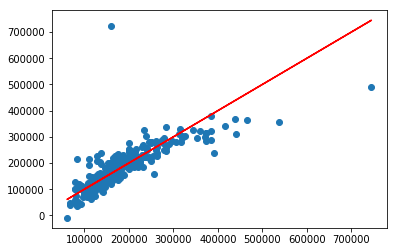

In [69]:
x_test = sm.add_constant(x_test)

# We are making predictions here
y_preds = result.predict(x_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")

In [70]:
from statsmodels.tools.eval_measures import mse, rmse

rmse(y_test, y_preds)

51154.08793986186

In [71]:
mse(y_test, y_preds)

2616740712.959121

In [72]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

28410.35556566689

In [73]:
(np.mean(np.abs((y_test - y_preds) / y_test)) * 100)

17.0156653689587

In [74]:
#Try to improve your model in terms of predictive performance by adding or removing some variables.

In [75]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [120]:
Y = houseprice_df['saleprice']
X = houseprice_df[['overallqual','grlivarea','garagearea','totalbsmtsf','enclosedporch','wooddecksf', 'bedroomabvgr', 'fireplaces']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [121]:
x_train = sm.add_constant(x_train)

result = sm.OLS(y_train,x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     603.5
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:53:44   Log-Likelihood:                -13861.
No. Observations:                1168   AIC:                         2.774e+04
Df Residuals:                    1159   BIC:                         2.779e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.981e+04   6023.289    -13.250

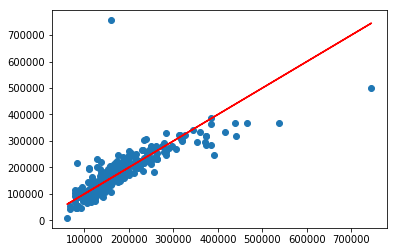

In [122]:
x_test = sm.add_constant(x_test)

# We are making predictions here
y_preds = result.predict(x_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")

In [123]:
rmse(y_test, y_preds)   #51154.08793986186 previous model 

51064.43577615066

In [124]:
mse(y_test, y_preds)    #2616740712.959121 previous model 

2607576601.1366158

In [125]:
#after adding/removing explanatory variables, the second model had the better fit as r-squared,
#adjusted r-squared values were higher than the first model.
#when it comes to predictive performance, the second model also is better as the evaluation metrics were
#lower than the first model. 
#statistical significance of each coefficients were better for the second model as well.